<a href="https://colab.research.google.com/github/Sushmitha-Katti/EVA-4/blob/master/Session14/data_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mean and Std**
1. **Fg-Bg**
    * Mean - [0.65830478, 0.61511271, 0.5740604 ]
    * Std -  [0.24408717, 0.2542491, 0.26870159]
2. **Fg-Bg-Mask**
    * Mean - [0.04608837, 0.04608837, 0.04608837]
    * Std -  [0.20544916, 0.20544916, 0.20544916] 
3. **Depth Images**
    * Mean - [0.50911522, 0.50911522, 0.50911522]
    * Std -  [0.28174302, 0.28174302, 0.28174302]

## **Storage**
1. **Background Images** 1.2MB
2. **Foreground Images**  1.2MB
3. **Foreground Mask** 333KB
4. **Dataset** 3.92GB

     ### Total = 4.GB Approx

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Extract data
import zipfile
for i in range(5):
  archive = zipfile.ZipFile(f'/content/gdrive/My Drive/Mask_Rcnn/Dataset/data_part{str(i+1)}.zip')
  archive.extractall()

In [0]:
#calculate STd and Mean
from tqdm import notebook
from PIL import Image
import numpy as np
def mean_std(path,type):

    n = 0
    s = np.zeros(3)
    sq = np.zeros(3)
    start = 0
    stop = 80000
    for part in range(5):
      print(f"from {start} to {stop} of set {part+1}")
      for i in notebook.tqdm(range(start,stop)):
          
            img = Image.open(f'/content/data_{str(part+1)}{path}{str(i+1)}.{type}')
            x = np.array(img)/255
            s += x.sum(axis=(0,1))
            sq += np.sum(np.square(x), axis=(0,1))
            n += x.shape[0]*x.shape[1]
      start += 80000
      stop+=80000


    mu = s/n
    std = np.sqrt((sq/n - np.square(mu)))
    print(mu, sq/n, std, n)

# Mean and Std for Fg-Bg





In [141]:
mean_std(path ="/Fg-Bg/fg-bg",type = "jpg" )

from 0 to 80000 of set 1



from 80000 to 160000 of set 2



from 160000 to 240000 of set 3



from 240000 to 320000 of set 4



from 320000 to 400000 of set 5



[0.65830478 0.61511271 0.5740604 ] [0.49294373 0.44300626 0.40174589] [0.24408717 0.2542491  0.26870159] 20070400000


# Mean  and Std for fg-bg-mask

In [14]:
mean_std(path ="/Fg-Bg-Mask/fg-bg-mask",type = "jpg" )

from 0 to 80000 of set 1



from 80000 to 160000 of set 2



from 160000 to 240000 of set 3



from 240000 to 320000 of set 4



from 320000 to 400000 of set 5



[0.04608837 0.04608837 0.04608837] [0.0443335 0.0443335 0.0443335] [0.20544916 0.20544916 0.20544916] 20070400000


# Mean and Std for Depth Images

In [8]:
mean_std(path ="/Depth/depth",type = "jpg" )

from 0 to 80000 of set 1



from 80000 to 160000 of set 2



from 160000 to 240000 of set 3



from 240000 to 320000 of set 4



from 320000 to 400000 of set 5



[0.50911522 0.50911522 0.50911522] [0.33857744 0.33857744 0.33857744] [0.28174302 0.28174302 0.28174302] 20070400000


# **du** command to calculate the total size of data

In [136]:
#this is the amount of storage used in the drive
!du -c  "/content/gdrive/My Drive/Mask_Rcnn/"

1208	/content/gdrive/My Drive/Mask_Rcnn/Foreground
1253	/content/gdrive/My Drive/Mask_Rcnn/Background
357	/content/gdrive/My Drive/Mask_Rcnn/Mask
4120090	/content/gdrive/My Drive/Mask_Rcnn/Dataset
4175895	/content/gdrive/My Drive/Mask_Rcnn/
4175895	total


In [142]:
#this is amount of storage used. This is the actual one. This will be in terms of kB
!du    --apparent-size "/content/gdrive/My Drive/Mask_Rcnn/"

1184	/content/gdrive/My Drive/Mask_Rcnn/Foreground
1227	/content/gdrive/My Drive/Mask_Rcnn/Background
333	/content/gdrive/My Drive/Mask_Rcnn/Mask
4120089	/content/gdrive/My Drive/Mask_Rcnn/Dataset
4175819	/content/gdrive/My Drive/Mask_Rcnn/


In [143]:
!du -h  --apparent-size "/content/gdrive/My Drive/Mask_Rcnn/" # human understandable form

1.2M	/content/gdrive/My Drive/Mask_Rcnn/Foreground
1.2M	/content/gdrive/My Drive/Mask_Rcnn/Background
333K	/content/gdrive/My Drive/Mask_Rcnn/Mask
4.0G	/content/gdrive/My Drive/Mask_Rcnn/Dataset
4.0G	/content/gdrive/My Drive/Mask_Rcnn/


# Display Sample Images

In [0]:
def stack_images(path,rangea,rangeb,type,skip):
  images = []
  import torchvision
  import skimage
  import matplotlib.pyplot as plt
  import numpy as np
  for i in notebook.tqdm(range(rangea,rangeb,skip)):
        
          img = Image.open(f'/content/{path}{str(i+1)}.{type}')
          images.append(np.array(img))
  return images


In [0]:
#to display images
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure(figsize=(2,2))
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        plt.axis("off")
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    
   

## Fg-Bg

In [108]:
images = stack_images(path = "data_1/Fg-Bg/fg-bg",rangea = 100,rangeb= 900,type = "jpg",skip = 100)



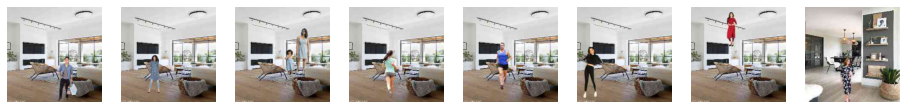

In [120]:
show_images(all_images, cols = 1, titles = None)

## Fg-Bg-Mask


In [117]:
images = stack_images(path = "data_1/Fg-Bg-Mask/fg-bg-mask",rangea = 100,rangeb= 900,type = "jpg",skip = 100)

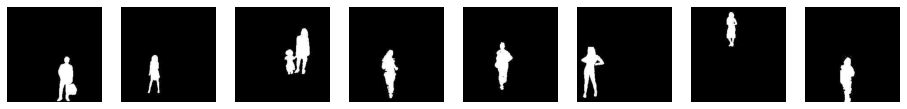

In [118]:
show_images(all_images, cols = 1, titles = None)

#Fg-Bg-Mask

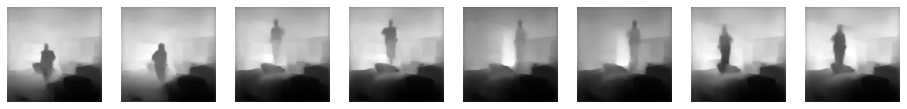

In [109]:
images = stack_images(path = "data_1/Depth/depth",rangea = 100,rangeb= 900,type = "jpg",skip = 100)
show_images(all_images, cols = 1, titles = None)

## Foreground 

In [124]:
images = stack_images(path = "/gdrive/Mask_Rcnn/Foreground/fg",rangea = 1,rangeb= 20,type = "png",skip = 0)


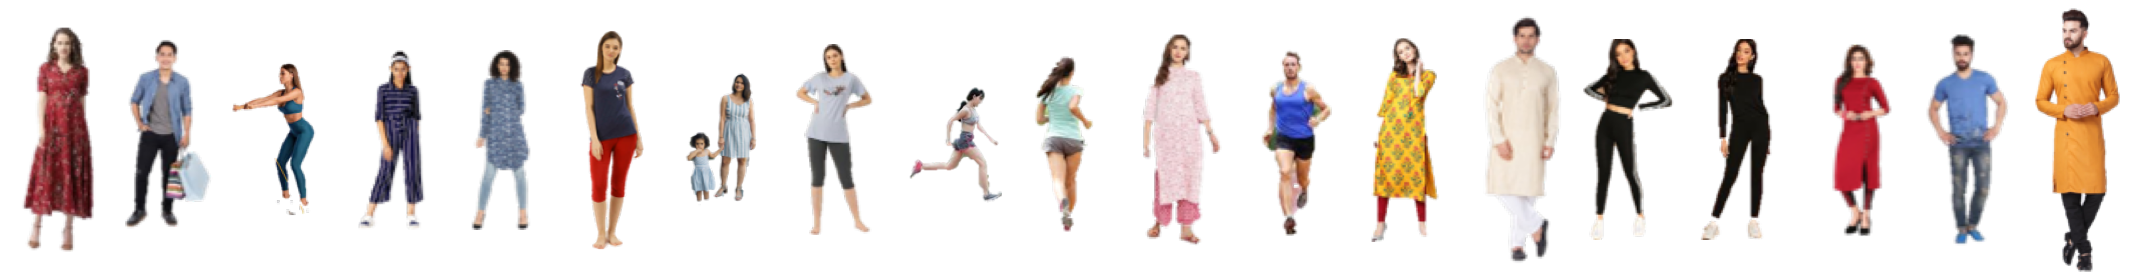

In [125]:
show_images(images, cols = 1, titles = None)

## Foreground Mask

In [132]:

images = stack_images(path = "/gdrive/Mask_Rcnn/Mask/mask",rangea = 1,rangeb= 20,type = "jpg",skip = 0)

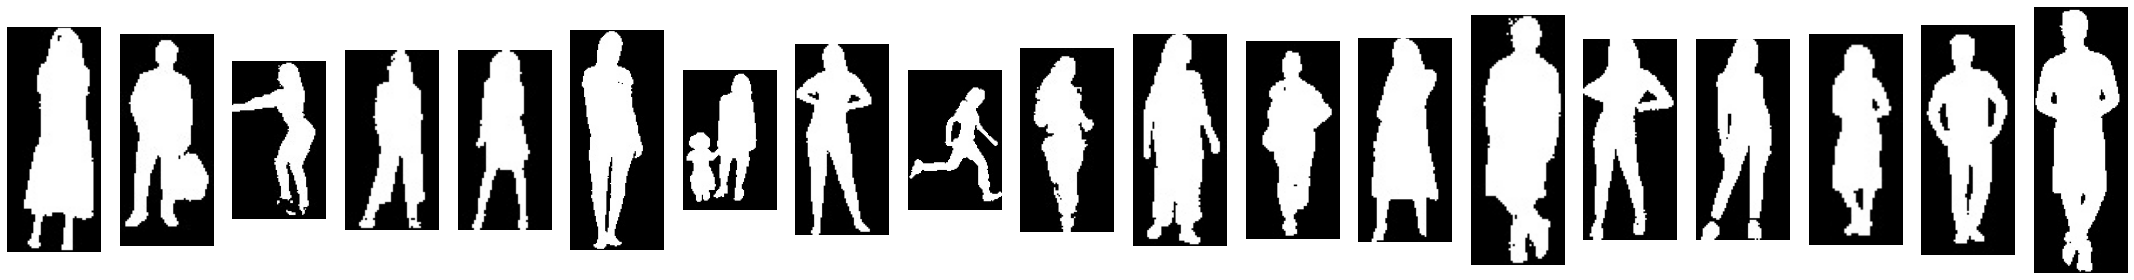

In [133]:
show_images(images, cols = 1, titles = None)

## Background

In [128]:
images = stack_images(path = "/gdrive/Mask_Rcnn/Background/bg",rangea = 1,rangeb= 9,type = "jpg",skip = 0)


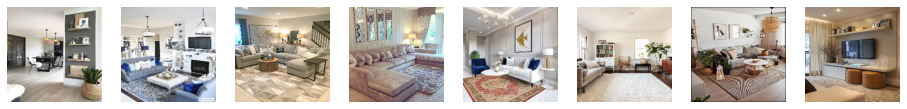

In [129]:
show_images(images, cols = 1, titles = None)